In [37]:
import numpy as np
import pandas as pd
from read_data import read_data
from image import image_process
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import time

In [18]:
X,y = read_data()

In [19]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
y

,class
0,5
1,0
2,4
3,1
4,9
...,...
69995,2
69996,3
69997,4
69998,5


### Visualization of Dataset

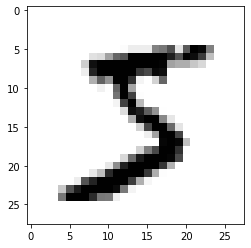

In [21]:
digits = X

img = image_process(digits)
img.show_image(0)


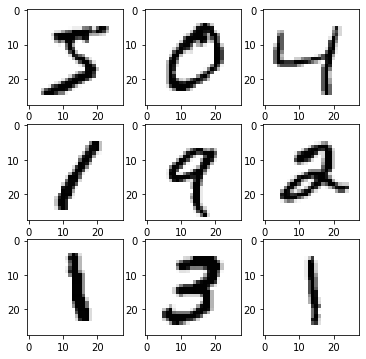

In [22]:
img = image_process(digits)
img.show_nine_image(0)

&nbsp;<br>
### Model Training
Four machine learning models are selected: Logistic Regression, Multilayer Perceptron, Random Forest Classifier, K-nearest Neighbors

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# flatten the column vector y to 1-D array
y_train = np.ravel(y_train,order='c')
y_test = np.ravel(y_test, order='c')

In [24]:
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43623,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23786,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
y_train

array([3, 1, 5, ..., 1, 6, 3])

In [26]:
print(X_train.shape, y_train.shape)

(49000, 784) (49000,)


&nbsp;<br>
**Performance of Different Classification Models**

In [34]:
reg = LogisticRegression(solver="liblinear")

reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.9173333333333333

In [28]:
# cross-validation for Logistic Regression
cv = cross_val_score(reg, X_train, y_train, cv = 5)
print(cv)
print(cv.mean()) # average accuracy from cross-validation is 91.57% using logistic regression

[0.91469388 0.92244898 0.92040816 0.91714286 0.9205102 ]
0.9190408163265307


In [29]:
mlp = MLPClassifier()

mlp.fit(X_train, y_train)
mlp.score(X_test, y_test)

0.9743809523809523

In [30]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.967047619047619

In [31]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.97

&nbsp;<br>
**Confusion Matrix**
1. Visualize and compare the performance of models used
2. All models show higher inaccurary with predicting digits 2, 3, and 8

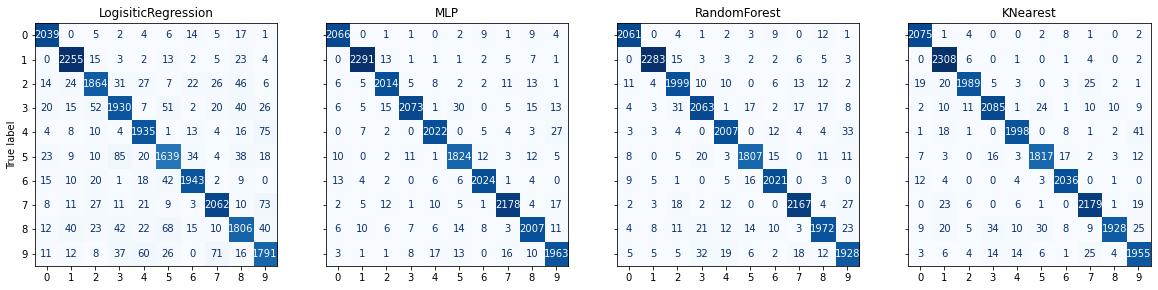

In [38]:
# This displays confusion matrices for all models used, we can actually see the comparison now...
models = {
    "LogisiticRegression": reg,
    'MLP': mlp,
    'RandomForest': rf,
    "KNearest": knn
}

fig, axes = plt.subplots(1,4, sharex=True, sharey=True,figsize=(20,10))

for i, (key, classifier) in enumerate(models.items()):
    model_predict = classifier.predict(X_test)
    cf_matrix = confusion_matrix(y_test, model_predict)
    disp = ConfusionMatrixDisplay(cf_matrix)
    disp.plot(ax=axes[i], cmap=plt.cm.Blues)
    disp.ax_.set_title(key)
    disp.ax_.set_xlabel('')
    disp.im_.colorbar.remove()
    # plt.colorbar(disp.im_, ax=axes[i], fraction=0.046, pad=0.04)

    if i!=0:
        disp.ax_.set_ylabel('')

**How to interprete these matrices?**
1. For entry i, j in the matrix, the number in it represents the number of predicts which has predicted label i and actual label j.
2. As can be seen in the color bar on the right hand side, darker blue means more, so we can see most of samples are predicted correctly for all the models.
3. One particularly intresting thing is that, it seems that our models are good at predicting different kinds of numbers, for example, logistic regression often confuses between 1 and 8, but random forest and KNN did super good on it.

&nbsp;<br>
### Efficiency Plot
Execution Time vs. Accuracy Score on different models

In [ ]:
def get_efficiency(models, X_train, y_train, X_test, y_test):
    """ Get accuracy score and execution time of each model

    Args:
        models: list of machine learning models that we would like to know its efficiency and performance
        X_train: Training features
        y_train: Training labels
        X_test: Testing features
        y_test: Testing labels

    Returns:
        List[float], List[float]: Score of models, Execution time of models
    """
    score = []
    execution_time = []

    for model in models:
        start_time = time.time()
        model.fit(X_train, y_train)
        score.append(model.score(X_test, y_test))
        execution_time.append(time.time()-start_time)
        
    return np.round(score,4), np.round(execution_time,4)


In [ ]:
models = [LogisticRegression(solver="liblinear"), MLPClassifier(), RandomForestClassifier(), KNeighborsClassifier()]
score_time = get_time(models, X_train, y_train, X_test, y_test)

In [ ]:
score_time_ratio = []
for i in range(len(score_time[0])):
    score_time_ratio.append(score_time[0][i] / score_time[1][i])
print(score_time, score_time_ratio)

(array([0.9161, 0.9763, 0.9684, 0.9709]), array([54.3764, 51.386 , 21.981 , 36.4333])) [0.016847382320271297, 0.01899933834118242, 0.0440562303807834, 0.026648697757271505]


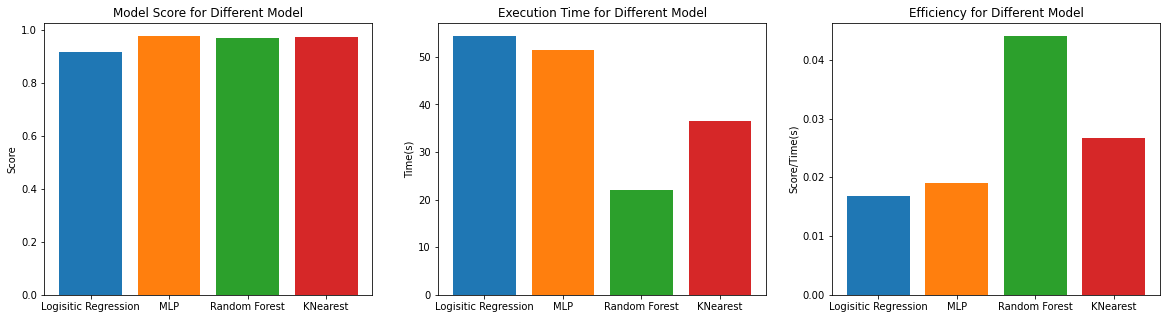

In [ ]:
models_label = [
    "Logisitic Regression",
    'MLP',
    'Random Forest',
    "KNearest"
]

fig, ax = plt.subplots(1, 3, figsize = (20,5))

for i in range(len(score_time[0])):
    ax[0].bar(models_label[i], score_time[0][i])
    ax[1].bar(models_label[i], score_time[1][i])
    ax[2].bar(models_label[i], score_time_ratio[i])
    ax[0].set(title = "Model Score for Different Model", ylabel = "Score")
    ax[1].set(title = "Execution Time for Different Model", ylabel = "Time(s)")
    ax[2].set(title = "Efficiency for Different Model", ylabel = "Score/Time(s)")

**Interpreting these histograms**
1. It seems that logistic regression is bad in this particular dataset. It's not that accurate, and takes a long time...
2. Multilayer perceptron is good in performance, but in the same time it's quite time consuming. I guess that's like a typical neural network behavior, which seems to take a lot of resourses.
3. KNN and Random Forest seems to be the best algorithms to employ here. They both have good performance (KNN is slightly higher but within range of error), and they are both resource friendly.

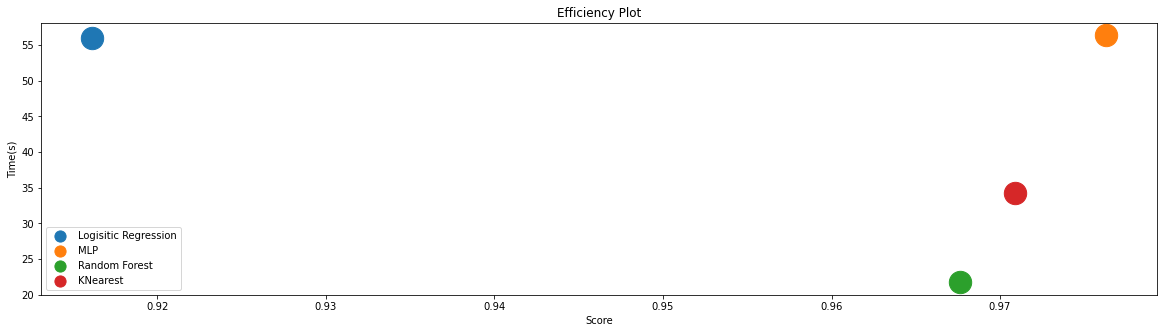

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (20,5))

for i in range(len(score_time[0])):
    x, y = score_time[0][i], score_time[1][i]
    ax.scatter(x, y, s = 500)
    ax.legend(models_label, loc = "lower left", markerscale = 0.5)
    ax.set(title = "Efficiency Plot", ylabel = "Time(s)", xlabel = "Score")


**Interpreting this scatter plot**
1. This graph plots one time behavior (score vs. time) for all four classification models
2. Points closer to the bottom right have higher efficiency (high accuracy score + short execution time)
3. So we have a trade-off to decide between choosing red and green point (KNN and Random Forest)